In [76]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [77]:
study_name = "bayesian_opt_v1"  # Unique identifier of the study.
storage_name = f"sqlite:///C:/Users/Noaja/Downloads/msci_project/tth-ML-project/models/{study_name}.db"
data = optuna.load_study(study_name=study_name, storage=storage_name)

best val: -0.4566


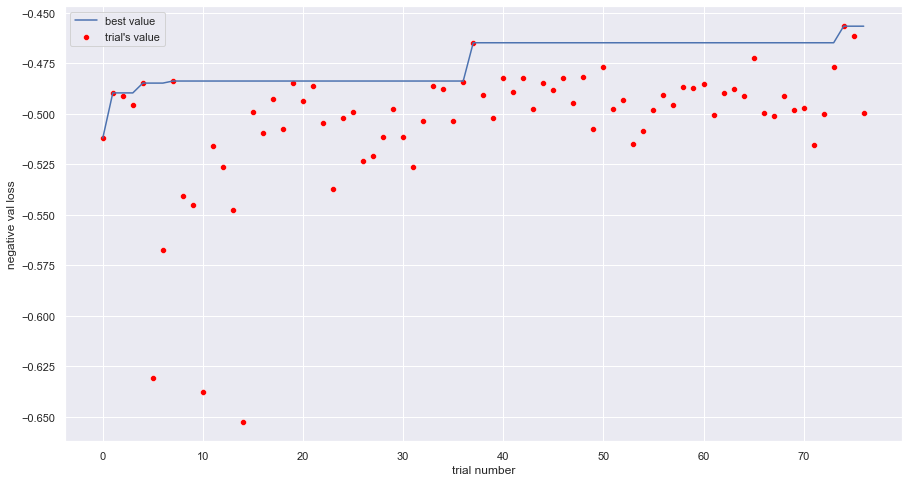

In [78]:
df = data.trials_dataframe(attrs=("value", "params", "state"))
df.dropna(inplace=True)
df.reset_index(inplace=True)

sns.set(rc = {'figure.figsize':(15,8)})
print('best val:', - round(df['value'].min(),4))
a = sns.lineplot(x=df.index, y=-df['value'].cummin())
a.set_xlabel('trial number')
sns.scatterplot(x=df.index, y=-df['value'], color='red')
a.set_ylabel('negative val loss')
a.legend(['best value', "trial's value"])
plt.show()

In [79]:
df.sort_values(by=['value'], ascending=True)

,index,value,params_batch_size,params_dnn_units,params_dropout,params_layer4,params_layer5,params_lr,params_lstm_layer2,params_lstm_units,params_merged_units,params_redroput,state
74,78,0.456627,128,40,0.033608,False,True,0.008692,False,180,180,0.142991,COMPLETE
75,79,0.461449,64,140,0.035391,False,True,0.029270,False,200,180,0.130580,COMPLETE
37,41,0.464831,64,120,0.051775,False,True,0.000690,False,180,180,0.071800,COMPLETE
65,69,0.472448,32,80,0.042911,False,True,0.000849,False,60,200,0.091232,COMPLETE
73,77,0.476941,128,60,0.185214,False,True,0.000468,False,140,220,0.099540,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,15,0.547556,16,100,0.194171,False,False,0.007853,False,300,200,0.143677,PRUNED
6,7,0.567163,128,220,0.250249,False,True,0.030885,True,240,100,0.222723,PRUNED
5,6,0.631000,32,200,0.070915,False,True,0.019409,True,100,140,0.046113,PRUNED
10,11,0.637815,64,180,0.086781,True,False,0.001058,False,140,220,0.036598,PRUNED
